<a href="https://colab.research.google.com/github/felixyuzhenyang/MSSP-6070-YuzhenYang/blob/main/Assignment3_YuzhenYang_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Environment Set Up

In [1]:
# !rm -rf /content/*

In [2]:
!pip install stargazer

In [3]:
from google.colab import userdata
import os
os.chdir('/content')
github_token = userdata.get('GitHub_MSSP6070')
owner = 'felixyuzhenyang'
repository = 'MSSP-6070-YuzhenYang'

clone_url = f'https://{github_token}@github.com/{owner}/{repository}.git'

!git clone {clone_url}

Cloning into 'MSSP-6070-YuzhenYang'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 369 (delta 13), reused 10 (delta 10), pack-reused 351 (from 2)
Receiving objects: 100% (369/369), 8.98 MiB | 8.25 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

working_directory = "/content/MSSP-6070-YuzhenYang/data/data_assignment3"

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)
warnings.filterwarnings("ignore")

try:
    os.chdir(working_directory)
    print(f"New working path successfully set: {os.getcwd()}")
except FileNotFoundError:
    print(f"error: path not exist: {working_directory}")

df = pd.read_csv("HousingPrices.csv", encoding="latin1", low_memory=False)

print(f"Successfully load {"HousingPrices.csv"}, {df.shape[0]} rows and{df.shape[1]} columns.")
print("\nFirst 5 rows:")
display(df.head())
print("\nData info:")
print(df.info())
print("\nBasic describe:")
display(df.describe())

New working path successfully set: /content/MSSP-6070-YuzhenYang/data/data_assignment3
Successfully load HousingPrices.csv, 1460 rows and17 columns.

First 5 rows:


,Id,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,TotalRooms,GarageCars,GarageArea,YrSold,SalePrice
0,1,65.0,8450.0,2Story,7,5,2003,856.0,Y,856,854,2,8,2,548,2008,208500
1,2,80.0,9600.0,1Story,6,8,1976,NaN,Y,1262,0,2,6,2,460,2007,181500
2,3,68.0,11250.0,2Story,7,5,2001,920.0,Y,920,866,2,6,2,608,2008,223500
3,4,60.0,9550.0,2Story,7,5,1915,NaN,Y,961,756,1,7,3,642,2006,140000
4,5,84.0,14260.0,2Story,8,5,2000,1145.0,Y,1145,1053,2,9,3,836,2008,250000



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1341 non-null   float64
 3   HouseStyle   1460 non-null   object 
 4   OverallQual  1460 non-null   int64  
 5   OverallCond  1460 non-null   int64  
 6   YearBuilt    1460 non-null   int64  
 7   TotalBsmtSF  913 non-null    float64
 8   CentralAir   1460 non-null   object 
 9   1stFlrSF     1460 non-null   int64  
 10  2ndFlrSF     1460 non-null   int64  
 11  FullBath     1460 non-null   int64  
 12  TotalRooms   1460 non-null   int64  
 13  GarageCars   1460 non-null   int64  
 14  GarageArea   1460 non-null   int64  
 15  YrSold       1460 non-null   int64  
 16  SalePrice    1460 non-null   int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 194.0+ KB
None

Basic descri

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotalRooms,GarageCars,GarageArea,YrSold,SalePrice
count,1460.000000,1201.000000,1341.000000,1460.000000,1460.000000,1460.000000,913.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10440.099925,6.099315,5.575342,1971.267808,1055.813801,1162.626712,346.992466,1.565068,6.517808,1.767123,472.980137,2007.815753,180921.195890
std,421.610009,24.284752,10051.013206,1.382997,1.112799,30.202904,409.495459,386.587738,436.528436,0.550916,1.625393,0.747315,213.804841,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7500.000000,5.000000,5.000000,1954.000000,806.000000,882.000000,0.000000,1.000000,5.000000,1.000000,334.500000,2007.000000,129975.000000
50%,730.500000,69.000000,9382.000000,6.000000,5.000000,1973.000000,996.000000,1087.000000,0.000000,2.000000,6.000000,2.000000,480.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11500.000000,7.000000,6.000000,2000.000000,1286.000000,1391.250000,728.000000,2.000000,7.000000,2.000000,576.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,3206.000000,4692.000000,2065.000000,3.000000,14.000000,4.000000,1418.000000,2010.000000,755000.000000


# Part 2 Data Cleaning

In [5]:
#### check missing value
print("Missing values per column:")
display(df.isnull().sum())

missing_price = df['SalePrice'].isnull().sum()
print("\nMissing SalePrice:", missing_price)

Missing values per column:


,0
Id,0
LotFrontage,259
LotArea,119
HouseStyle,0
OverallQual,0
OverallCond,0
YearBuilt,0
TotalBsmtSF,547
CentralAir,0
1stFlrSF,0



Missing SalePrice: 0


# Part 3 Descriptive Statistics

In [6]:
# 1. mean and std
mean_price = df['SalePrice'].mean()
std_price = df['SalePrice'].std()

print(f"Mean Sale Price: ${mean_price:,.2f}")
print(f"Standard Deviation of Sale Price: ${std_price:,.2f}")

# 2. min, max, median, quartile
price_summary = df['SalePrice'].describe()

print("\nSalePrice Summary Statistics:")
display(price_summary)

summary_table = pd.DataFrame({
    'Statistic': ['Mean', 'Std. Dev', 'Min', '25th Percentile', 'Median', '75th Percentile', 'Max'],
    'Value': [
        df['SalePrice'].mean(),
        df['SalePrice'].std(),
        df['SalePrice'].min(),
        df['SalePrice'].quantile(0.25),
        df['SalePrice'].median(),
        df['SalePrice'].quantile(0.50),
        df['SalePrice'].quantile(0.75),
    ]
})

print("\nFormatted Summary Table (for report):")
display(summary_table)


Mean Sale Price: $180,921.20
Standard Deviation of Sale Price: $79,442.50

SalePrice Summary Statistics:


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000



Formatted Summary Table (for report):


,Statistic,Value
0,Mean,180921.195890
1,Std. Dev,79442.502883
2,Min,34900.000000
3,25th Percentile,129975.000000
4,Median,163000.000000
5,75th Percentile,163000.000000
6,Max,214000.000000


# Part 4 Visualization for Sale Price

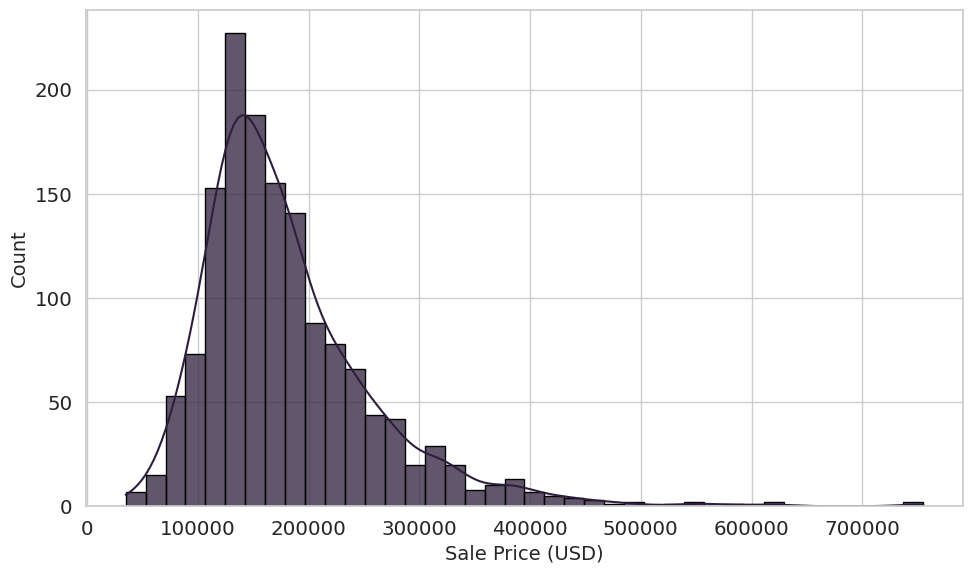

In [7]:
# sns.set(style="whitegrid", palette="muted", font_scale=1.3)
sns.set(style="whitegrid", palette="Set2", font_scale=1.3)
# 1. Histogram of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'],
             bins=40,
             kde=True,
             color=sns.color_palette("mako")[0],
             edgecolor='black',
             alpha=0.75)

# plt.title("Distribution of Housing Sale Prices in ABC Neighborhood", fontsize=18, pad=15)
plt.xlabel("Sale Price (USD)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.savefig("Distribution of Housing Sale Prices in ABC Neighborhood.png", dpi=300)
plt.show()


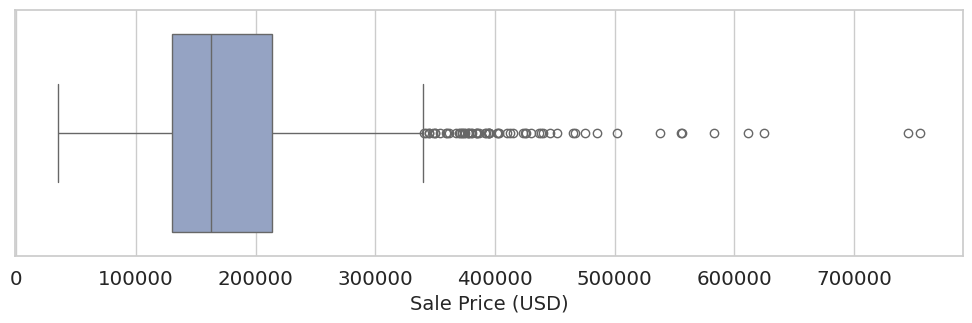

In [8]:
# 2. Boxplot of SalePrice (for outlier detection)
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    x=df['SalePrice'],
    color=sns.color_palette("Set2")[2]
)

# plt.title("Boxplot of Sale Prices", fontsize=16, pad=12)
plt.xlabel("Sale Price (USD)", fontsize=14)
plt.tight_layout()
plt.savefig("Boxplot of Sale Prices.png", dpi=300)
plt.show()

# Part 5 Outlier Detection

In [9]:
# 1. IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): ${Q1:,.2f}")
print(f"Q3 (75th percentile): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")

# 2. threshold: 1.5 IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nLower Bound: ${lower_bound:,.2f}")
print(f"Upper Bound: ${upper_bound:,.2f}")

outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
outliers_low = df[(df['SalePrice'] < lower_bound)]
outliers_high = df[(df['SalePrice'] > upper_bound)]

print(f"\nNumber of outliers detected: {outliers.shape[0]}")
print(f"\nNumber of low outliers detected: {outliers_low.shape[0]}")
print(f"\nNumber of high outliers detected: {outliers_high.shape[0]}")

print("\nOutlier Price Range:")
print(f"Max Outlier Price: ${df['SalePrice'].max():,.2f}")

Q1 (25th percentile): $129,975.00
Q3 (75th percentile): $214,000.00
IQR: $84,025.00

Lower Bound: $3,937.50
Upper Bound: $340,037.50

Number of outliers detected: 61

Number of low outliers detected: 0

Number of high outliers detected: 61

Outlier Price Range:
Max Outlier Price: $755,000.00


# Part 6 Exploratory Insights

## 6.1 OLS Regression

### 6.1.1 Original sale price

In [10]:
import numpy as np
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.display import HTML, display


### construct TotalLivArea & CentralAir_dummy
df['TotalLivArea'] = df['1stFlrSF'] + df['2ndFlrSF']
df['CentralAir_dummy'] = df['CentralAir'].map({'Y': 1, 'N': 0})

model_df = df.copy()

### reg
formula_linear = """
SalePrice ~ TotalLivArea + YearBuilt + OverallQual +
             GarageCars + FullBath + CentralAir_dummy +
             C(HouseStyle)
"""

model1 = smf.ols(formula=formula_linear, data=model_df).fit()

### output
print(model1.summary())

param_names = model1.params.index
house_terms = [p for p in param_names if p.startswith('C(HouseStyle)')]

dummy_styles = [term.split('T.')[-1].strip(']') for term in house_terms]
all_styles = sorted(model_df['HouseStyle'].unique())
baseline_candidates = [s for s in all_styles if s not in dummy_styles]
baseline_style = baseline_candidates[0] if baseline_candidates else None

print("HouseStyle baseline (reference category) in the model:", baseline_style)

base_order = [
    'TotalLivArea',
    'YearBuilt',
    'OverallQual',
    'GarageCars',
    'FullBath',
    'CentralAir_dummy',
]

house_terms_sorted = sorted(house_terms)

cov_order = base_order + house_terms_sorted + ['Intercept']

stargazer_lin = Stargazer([model1])
stargazer_lin.title("OLS Regression: SalePrice (Linear)")
stargazer_lin.covariate_order(cov_order)

html_lin = stargazer_lin.render_html()

with open("OLS_Model_Linear_Ordered.html", "w") as f:
    f.write(html_lin)

display(HTML(html_lin))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     378.9
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:47:58   Log-Likelihood:                -17461.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1446   BIC:                         3.502e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7

### 6.1.2 log(sale price)

In [11]:
### log transformation
min_price = df['SalePrice'].min()
print("Minimum SalePrice in data:", min_price)

if min_price <= 0:
    print("Non-positive SalePrice detected, log(SalePrice + 1).")
    df['logSalePrice'] = np.log(df['SalePrice'] + 1)
else:
    print("All SalePrice are positive. Using log(SalePrice).")
    df['logSalePrice'] = np.log(df['SalePrice'])

model_df['logSalePrice'] = np.log(model_df['SalePrice']) if min_price > 0 else np.log(model_df['SalePrice'] + 1)

### reg
formula_log = """
logSalePrice ~ TotalLivArea + YearBuilt + OverallQual +
               GarageCars + FullBath + CentralAir_dummy +
               C(HouseStyle)
"""

model2 = smf.ols(formula=formula_log, data=model_df).fit()
print(model2.summary())

### output
stargazer_log = Stargazer([model2])

stargazer_log.title("OLS Regression: log(SalePrice)")
stargazer_log.covariate_order(cov_order)

html_log = stargazer_log.render_html()

with open("OLS_Model_Log_Ordered.html", "w") as f:
    f.write(html_log)

display(HTML(html_log))

Minimum SalePrice in data: 34900
All SalePrice are positive. Using log(SalePrice).
                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     512.9
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:47:58   Log-Likelihood:                 527.72
No. Observations:                1460   AIC:                            -1027.
Df Residuals:                    1446   BIC:                            -953.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [12]:
### combine outcome

stargazer_combined = Stargazer([model1, model2])
stargazer_combined.title("Comparison of Linear vs Log-Linear Models")
stargazer_combined.covariate_order(cov_order)

html_combined = stargazer_combined.render_html()

with open("OLS_Combined_Linear_Log_Ordered.html", "w") as f:
    f.write(html_combined)

display(HTML(html_combined))

## 6.2 Visualization

### 6.2.1 distribution of ln(SalePrice)

Figure saved as 'F_logSalePrice_distribution.png'


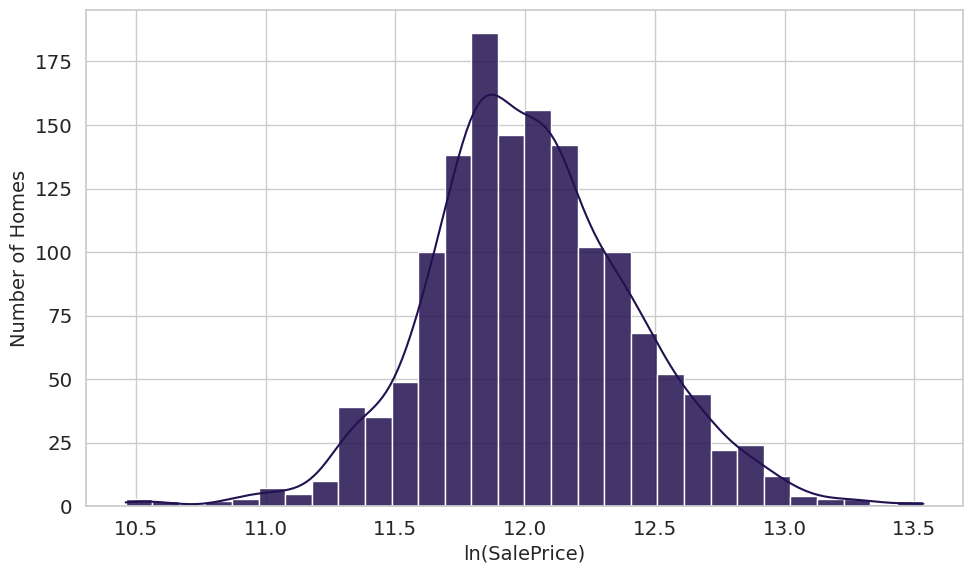

In [13]:
#### ==== distribution of ln(SalePrice) =====
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x="logSalePrice",
    bins=30,
    kde=True,
    color=sns.color_palette("magma")[0],
    edgecolor="white",
    alpha=0.85
)

# plt.title("Distribution of log(SalePrice)", fontsize=18)
plt.xlabel("ln(SalePrice)", fontsize=14)
plt.ylabel("Number of Homes", fontsize=14)
plt.tight_layout()

plt.savefig("F_logSalePrice_distribution.png", dpi=300)
print("Figure saved as 'F_logSalePrice_distribution.png'")
plt.show()

Figure saved as 'F_descriptive_others_combined_2x3.png'


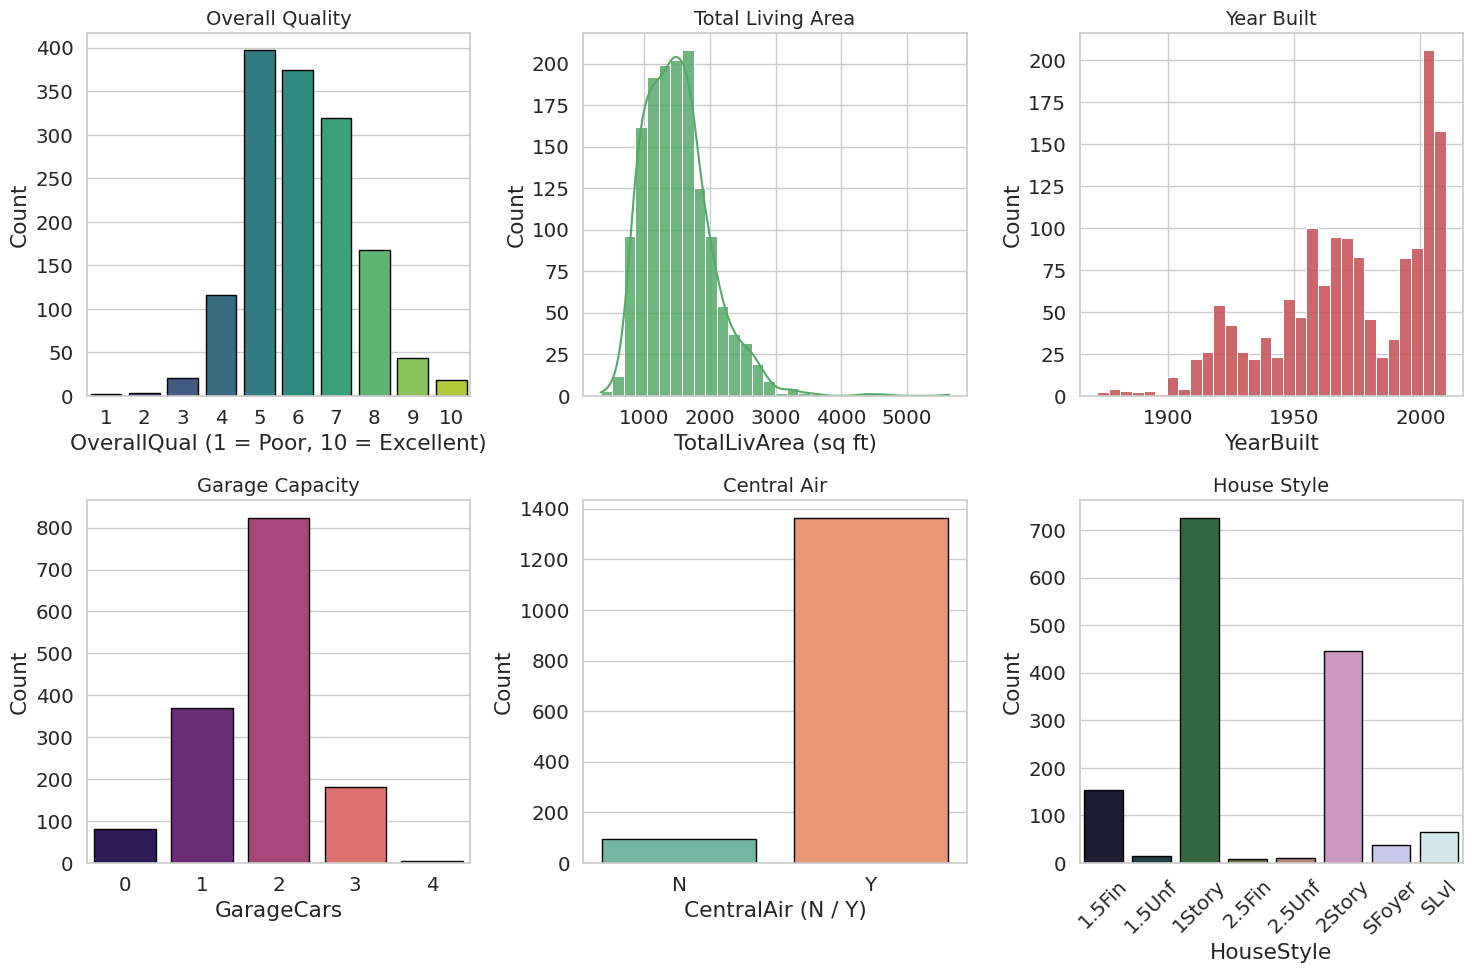

In [14]:
#### ==== 2. Combined descriptive plots for other variables ====
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# --- OverallQual ---
sns.countplot(
    x="OverallQual",
    data=df,
    ax=axes[0],
    palette="viridis",
    edgecolor="black"
)
axes[0].set_title("Overall Quality", fontsize=14)
axes[0].set_xlabel("OverallQual (1 = Poor, 10 = Excellent)")
axes[0].set_ylabel("Count")

# --- TotalLivArea ---
sns.histplot(
    data=df,
    x="TotalLivArea",
    bins=30,
    kde=True,
    ax=axes[1],
    color="#55A868",
    edgecolor="white",
    alpha=0.85
)
axes[1].set_title("Total Living Area", fontsize=14)
axes[1].set_xlabel("TotalLivArea (sq ft)")
axes[1].set_ylabel("Count")

# --- YearBuilt ---
sns.histplot(
    data=df,
    x="YearBuilt",
    bins=30,
    kde=False,
    ax=axes[2],
    color="#C44E52",
    edgecolor="white",
    alpha=0.85
)
axes[2].set_title("Year Built", fontsize=14)
axes[2].set_xlabel("YearBuilt")
axes[2].set_ylabel("Count")

# --- GarageCars ---
sns.countplot(
    x="GarageCars",
    data=df,
    ax=axes[3],
    palette="magma",
    edgecolor="black"
)
axes[3].set_title("Garage Capacity", fontsize=14)
axes[3].set_xlabel("GarageCars")
axes[3].set_ylabel("Count")

# --- CentralAir ---
sns.countplot(
    x="CentralAir",
    data=df,
    ax=axes[4],
    order=sorted(df["CentralAir"].dropna().unique()),
    palette="Set2",
    edgecolor="black"
)
axes[4].set_title("Central Air", fontsize=14)
axes[4].set_xlabel("CentralAir (N / Y)")
axes[4].set_ylabel("Count")

# --- HouseStyle ---
order_hs = sorted(df["HouseStyle"].dropna().unique())
sns.countplot(
    x="HouseStyle",
    data=df,
    ax=axes[5],
    order=order_hs,
    palette="cubehelix",
    edgecolor="black"
)
axes[5].set_title("House Style", fontsize=14)
axes[5].set_xlabel("HouseStyle")
axes[5].set_ylabel("Count")
axes[5].tick_params(axis="x", rotation=45)

# plt.suptitle("Descriptive Plots for Key Housing Attributes", fontsize=20, y=1.02)
plt.tight_layout()

plt.savefig("F_descriptive_others_combined_2x3.png", dpi=300)
print("Figure saved as 'F_descriptive_others_combined_2x3.png'")
plt.show()

### 6.2.3 Other Visualizations (Relationships between Sales Price and variables)

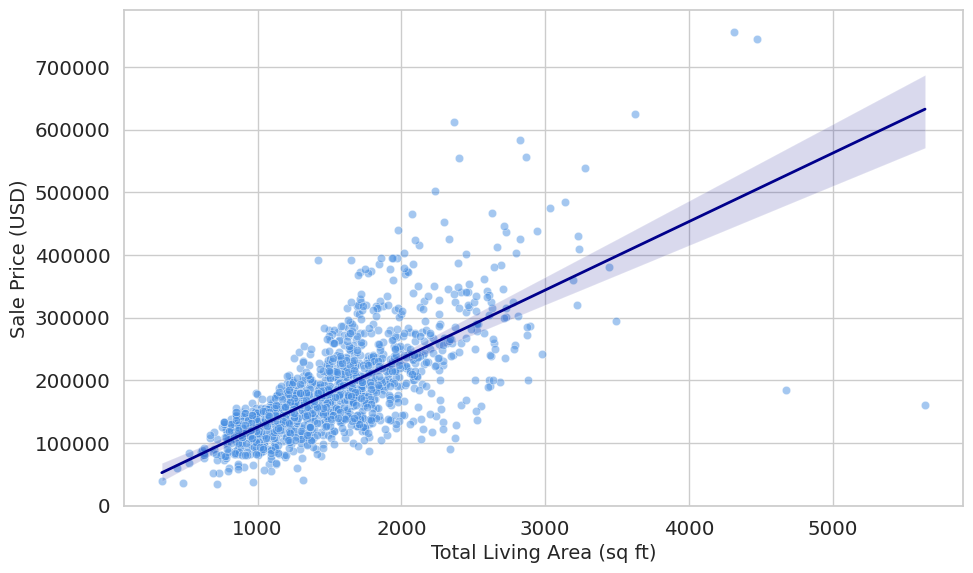

In [15]:
#### ==== SalePrice vs Total Living Area ====
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.3)

sns.scatterplot(
    x=df['TotalLivArea'],
    y=df['SalePrice'],
    alpha=0.5,
    color="#4A90E2"
)

sns.regplot(
    x=df['TotalLivArea'],
    y=df['SalePrice'],
    scatter=False,
    color="darkblue",
    line_kws={'linewidth': 2}
)

# plt.title("SalePrice vs Total Living Area", fontsize=18)
plt.xlabel("Total Living Area (sq ft)", fontsize=14)
plt.ylabel("Sale Price (USD)", fontsize=14)
plt.tight_layout()
plt.savefig("F_TotalLivArea_vs_SalePrice.png", dpi=300)
plt.show()

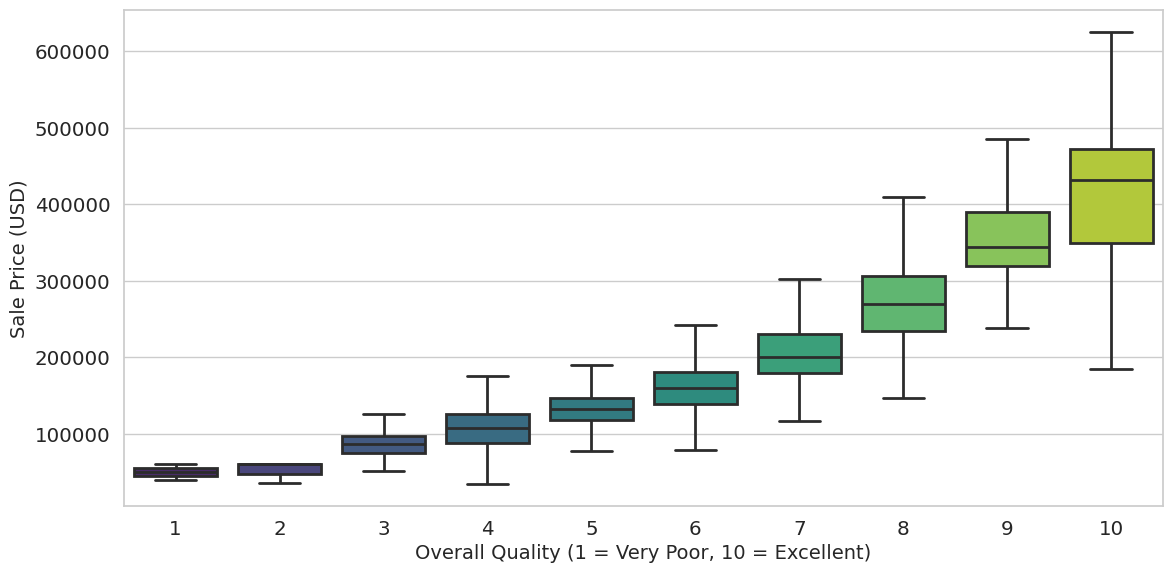

In [16]:
#### ==== Sale Price by Overall Quality Rating ====
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=1.3)

sns.boxplot(
    x='OverallQual',
    y='SalePrice',
    data=df,
    palette='viridis',
    showfliers=False,
    linewidth=2
)

"""
sns.stripplot(
    x='OverallQual',
    y='SalePrice',
    data=df,
    color="#4A90E2",
    alpha=0.22,
    jitter=0.25,
    size=3
)
"""

# plt.title("Sale Price by Overall Quality Rating", fontsize=18, pad=15)
plt.xlabel("Overall Quality (1 = Very Poor, 10 = Excellent)", fontsize=14)
plt.ylabel("Sale Price (USD)", fontsize=14)
plt.tight_layout()
plt.savefig("BSale Price by Overall Quality Rating.png", dpi=300)
plt.show()


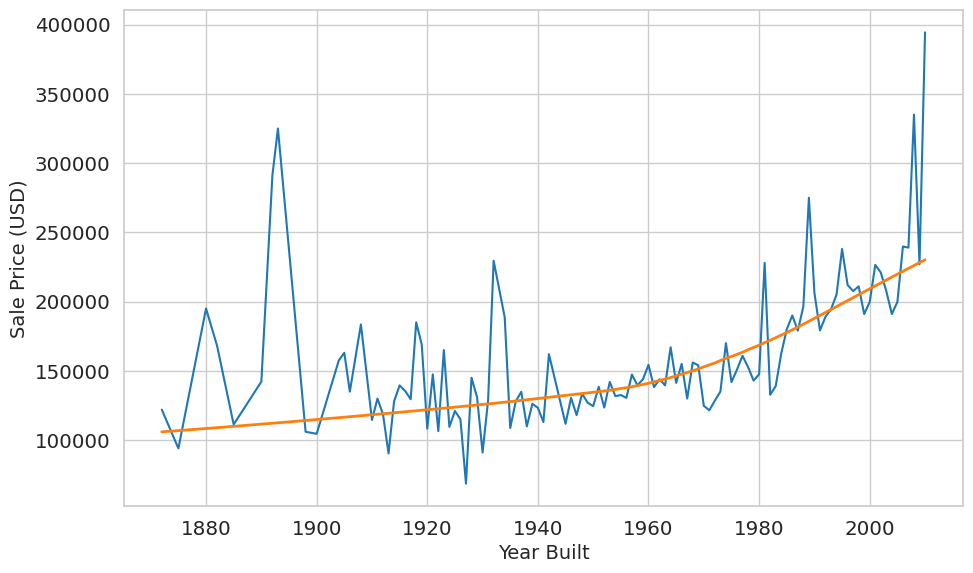

In [17]:
#### ==== SalePrice vs Year Built ====
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.3)

sns.lineplot(
    x="YearBuilt",
    y="SalePrice",
    data=df,
    color="#1f77b4",
    estimator="median",
    ci=None
)

sns.regplot(
    x=df['YearBuilt'],
    y=df['SalePrice'],
    scatter=False,
    lowess=True,
    color="#ff7f0e",
    line_kws={'linewidth': 2}
)

# plt.title("SalePrice vs Year Built", fontsize=18)
plt.xlabel("Year Built", fontsize=14)
plt.ylabel("Sale Price (USD)", fontsize=14)
plt.tight_layout()
plt.savefig("F_YearBuilt_vs_SalePrice.png", dpi=300)
plt.show()


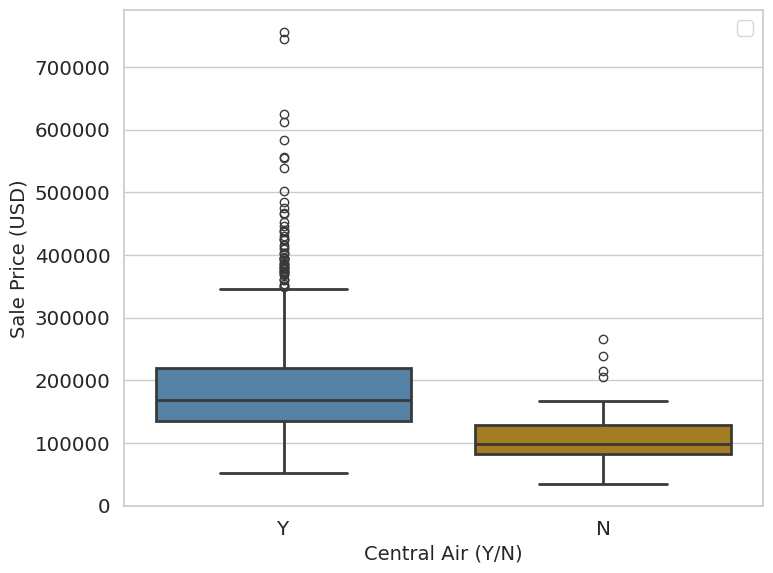

Average sales price with central air: $186,186.71
Average sales price without central air: $105,264.07


In [18]:
#### ==== SalePrice by Central Air Availability ====
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", font_scale=1.3)
CUSTOM_COLORS = ["#4682B4", "#B8860B"]
sns.boxplot(
    x="CentralAir",
    y="SalePrice",
    data=df,
   palette=CUSTOM_COLORS,
    linewidth=2
)

# plt.title("SalePrice by Central Air Availability", fontsize=18)
plt.xlabel("Central Air (Y/N)", fontsize=14)
plt.ylabel("Sale Price (USD)", fontsize=14)
plt.legend()
plt.tight_layout()

plt.savefig("F_CentralAir_vs_SalePrice.png", dpi=300)
plt.show()

mean_prices_air = df.groupby('CentralAir')['SalePrice'].mean()

if 'Y' in mean_prices_air.index:
    mean_Y = mean_prices_air.loc['Y']
    print(f"Average sales price with central air: ${mean_Y:,.2f}")

if 'N' in mean_prices_air.index:
    mean_N = mean_prices_air.loc['N']
    print(f"Average sales price without central air: ${mean_N:,.2f}")

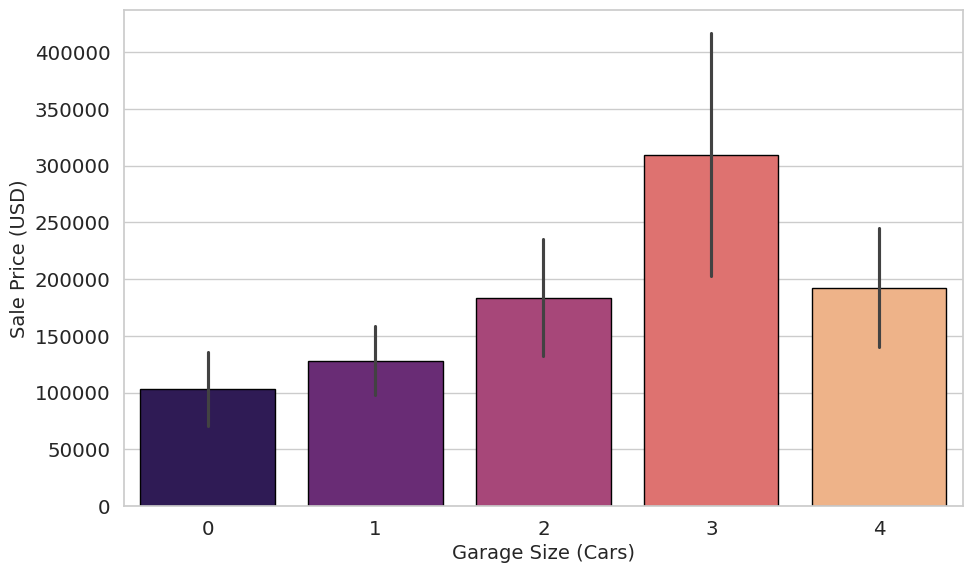

In [19]:
#### ==== Average SalePrice by Garage Capacity ====
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.3)

sns.barplot(
    x="GarageCars",
    y="SalePrice",
    data=df,
    palette="magma",
    ci="sd",
    edgecolor="black"
)

# plt.title("Average SalePrice by Garage Capacity", fontsize=18)
plt.xlabel("Garage Size (Cars)", fontsize=14)
plt.ylabel("Sale Price (USD)", fontsize=14)
plt.tight_layout()
plt.savefig("F_GarageCars_vs_SalePrice.png", dpi=300)
plt.show()


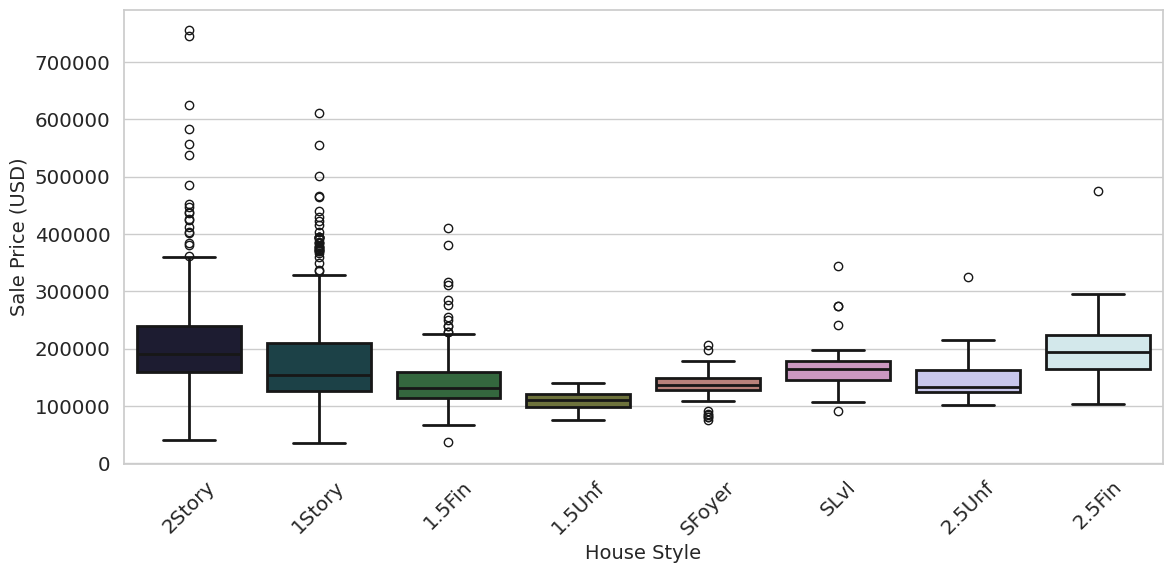

In [20]:
#### ==== SalePrice by HouseStyle ====
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=1.3)

sns.boxplot(
    x="HouseStyle",
    y="SalePrice",
    data=df,
    palette="cubehelix",
    linewidth=2
)

# plt.title("SalePrice by HouseStyle", fontsize=18)
plt.xlabel("House Style", fontsize=14)
plt.ylabel("Sale Price (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("F_HouseStyle_vs_SalePrice.png", dpi=300)
plt.show()


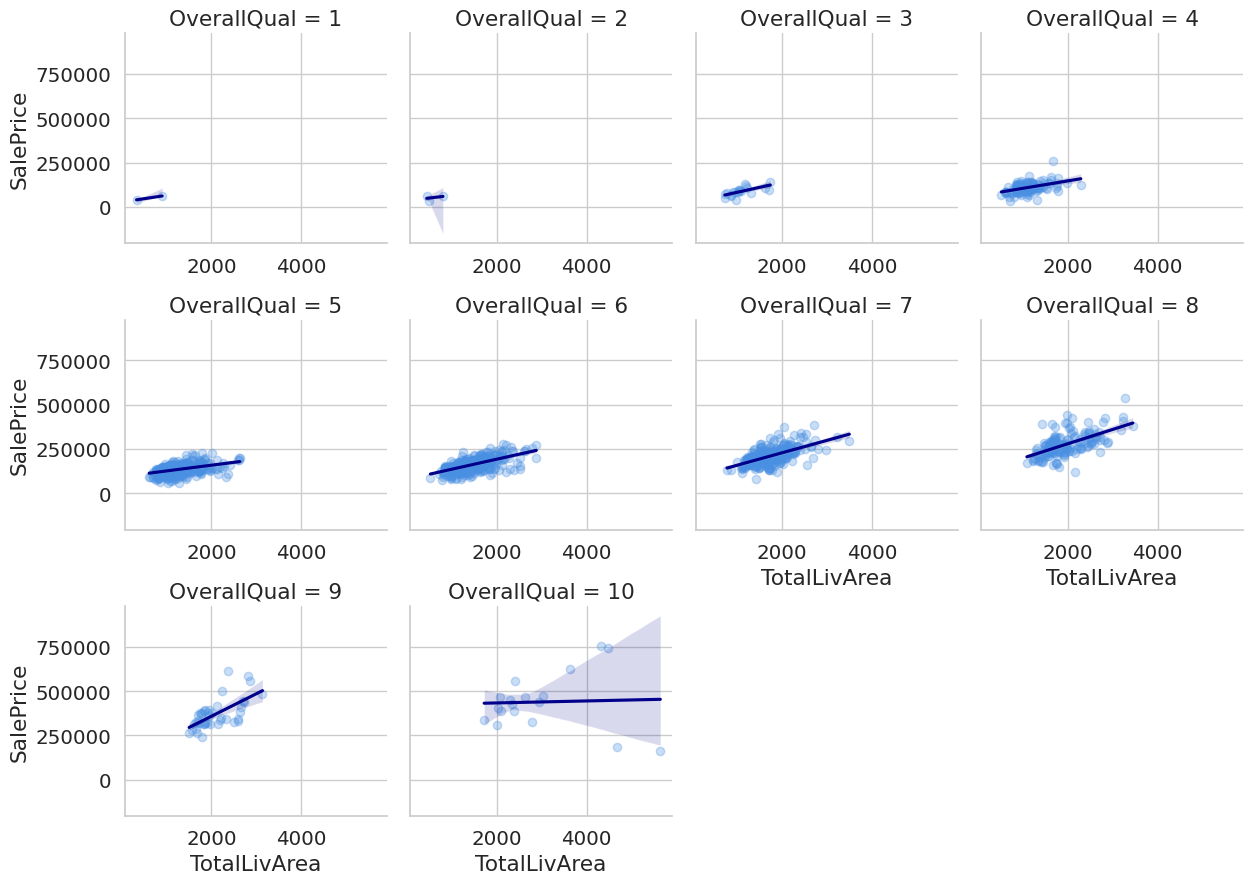

In [21]:
#### ==== Sale Price and Living Area by Quality Rating ====
g = sns.lmplot(
    data=df,
    x='TotalLivArea',
    y='SalePrice',
    col='OverallQual',
    col_wrap=4,
    height=3.2,
    scatter_kws={'alpha': 0.3, 'color': '#4A90E2'},
    line_kws={'color': 'darkblue'}
)
g.fig.subplots_adjust(top=0.9)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelbottom=True)

g.fig.savefig("F_Sale Price vs. Living Area by Quality Rating.png", dpi=300)

plt.show()